In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import uuid
import pickle
import pandas as pd

In [2]:
visualize = True

# Database

In [3]:
dimensions = 2
num_instances = 100

subset_size = 5
k = 3

In [4]:
vectors = []
for i in range(0, num_instances):
    x = round(100 * random.random(), 2)
    y = round(100 * random.random(), 2)
    
    vectors.append(np.array([x, y]))

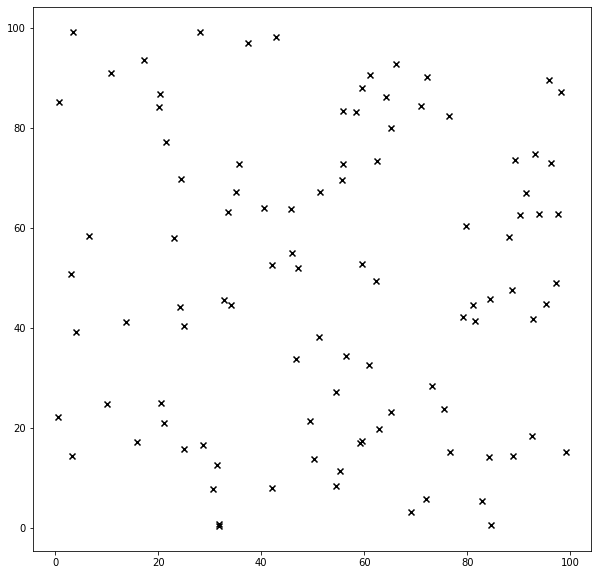

In [5]:
fig = plt.figure(figsize=(10, 10))

for x, y in vectors:
    plt.scatter(x, y, c = "black", marker = "x")
    
plt.show()

# Functions

In [6]:
class Node:
    def __init__(self, hyperplane = None, value = None, id = None, instances = 0):
        self.left = None
        self.right = None
        self.hyperplane = hyperplane
        self.value = value
        self.id = id
        self.instances = instances

In [7]:
# hyperplane = [1, 2, 3, 4] # equation: x + 2y + 3z = 4

In [8]:
def find_hyperplane(v1, v2):
    """
    finds the hyperplane equidistant from
    two given n-dimensional vectors v1 and v2
    """
    # find the midpoint of two vectors
    midpoint = (v1 + v2) / 2
    
    # find the direction vector from v1 to v2
    direction_vector = v2 - v1
    
    # find the unit vector of the direction vector
    unit_vector = direction_vector / np.linalg.norm(direction_vector)
    
    # define a normal vector to the hyperplane
    normal_vector = unit_vector
    
    # calculate the distance between midpoing and the hyperplane
    distance = np.dot(midpoint, normal_vector)
    
    # define the equation of the hyperplane
    hyperplane = np.concatenate((normal_vector, [distance]))
    
    return hyperplane

def is_on_left(v, hyperplane):
    # calculate the signed distance from v to the hyperplane
    signed_distance = np.dot(hyperplane[:-1], v) - hyperplane[-1]
    
    # if signed_distance is 0, then it is on the hyperplane
    if signed_distance < 0:
        return True
    else:
        return False

In [9]:
def plot_divisions(hyperplanes, v1, v2):
    fig = plt.figure(figsize=(10, 10))
    
    for x, y in vectors:
        plt.scatter(x, y, c="black", marker = "x")
    
    plt.scatter(v1[0], v1[1], c="red", marker="x")
    plt.scatter(v2[0], v2[1], c="red", marker="x")
    
    for idx, hyperplane in enumerate(hyperplanes):
        x = np.linspace(0, 100)
        y = (hyperplane[2] - hyperplane[0]*x) / hyperplane[1]
        plt.plot(x, y, "black" if idx < len(hyperplanes) -1 else "red")
    
    plt.ylim(0, 100)
    plt.xlim(0, 100)
    
    plt.show()

In [10]:
hyperplanes = []

In [11]:
def split_nodes(vectors, ids = None):
    if ids is None:
        ids = [*range(0, len(vectors))]
    
    # pick two random points
    point_1st_idx = 0; point_2nd_idx = 0
    
    while point_1st_idx == point_2nd_idx:
        point_1st_idx = random.randint(0, len(vectors) - 1)
        point_2nd_idx = random.randint(0, len(vectors) - 1)
    
    v1 = vectors[point_1st_idx]
    v2 = vectors[point_2nd_idx]
    
    # find the hyperplane equidistant from those two vectors
    hyperplane = find_hyperplane(v1, v2)
    hyperplanes.append(hyperplane)
    
    if visualize is True:
        print(f"{hyperplane[0]}x + {hyperplane[1]}y = {hyperplane[2]}")
        plot_divisions(hyperplanes=hyperplanes, v1=v1, v2=v2)
    
    # split vectors into left and right nodes
    left_nodes = []
    right_nodes = []
    
    left_ids = []
    right_ids = []
    
    for idx, vector in enumerate(vectors):
        is_left_node = is_on_left(v=vector, hyperplane=hyperplane)
        
        if is_left_node is True:
            left_nodes.append(vector)
            left_ids.append(ids[idx])
        else:
            right_nodes.append(vector)
            right_ids.append(ids[idx])
    
    assert len(left_nodes) + len(right_nodes) == len(vectors)
    
    current_node = Node(
        hyperplane=hyperplane,
        value=vectors,
        id=ids,
        instances=len(vectors)
    )
    
    if len(left_nodes) > subset_size:
        current_node.left = split_nodes(
            vectors=left_nodes,
            ids=left_ids
        )
    else:
        current_node.left = Node(
            value=left_nodes,
            id=left_ids,
            instances=len(left_nodes)
        )
    
    if len(right_nodes) > subset_size:
        current_node.right = split_nodes(
            vectors=right_nodes,
            ids=right_ids
        )
    else:
        current_node.right = Node(
            value=right_nodes,
            id=right_ids,
            instances=len(right_nodes)
        )
    
    return current_node

# Main Program

0.9620840526702035x + -0.2727531403992942y = 35.50244765831883


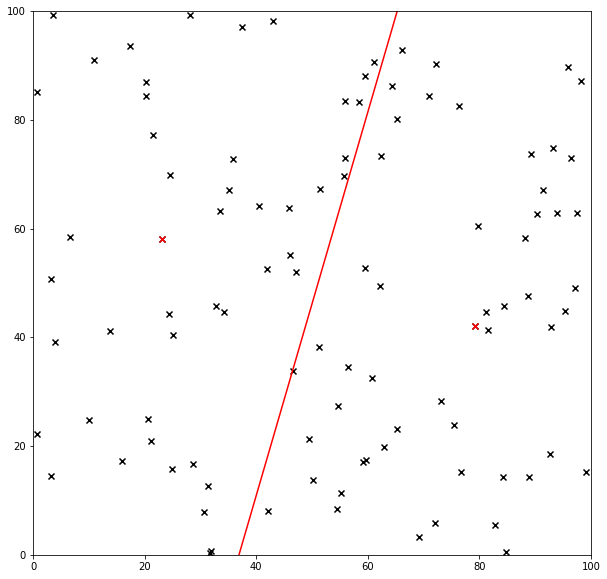

-0.0990922352878204x + -0.9950782526543643y = -53.17952276494674


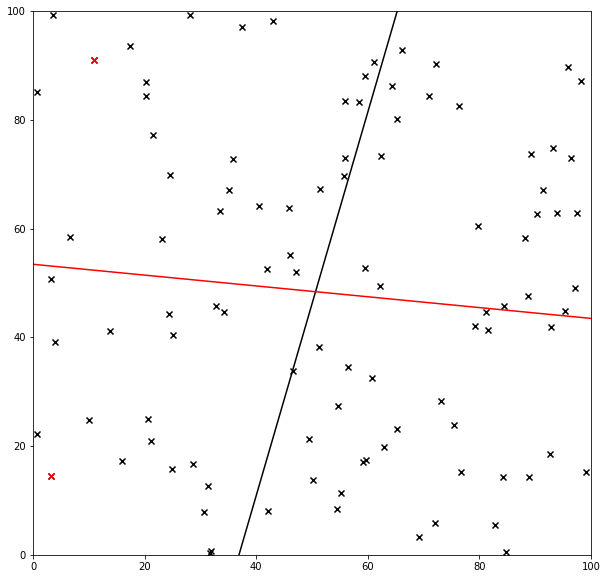

-0.07765294679160073x + 0.996980451089479y = 65.7309628331867


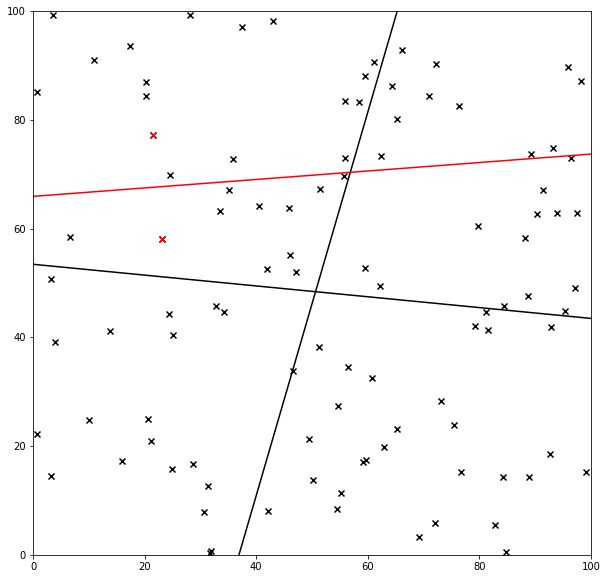

-0.997979181427044x + 0.0635417456339309y = -38.96065871294266


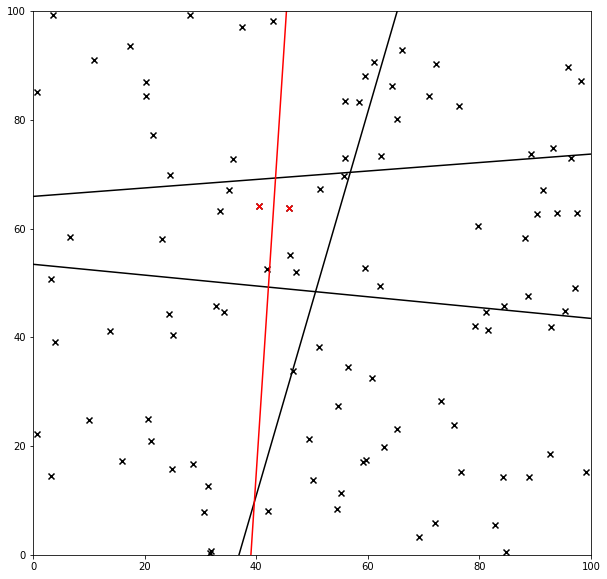

0.13480666510823427x + -0.9908719206044727y = -52.240154359771935


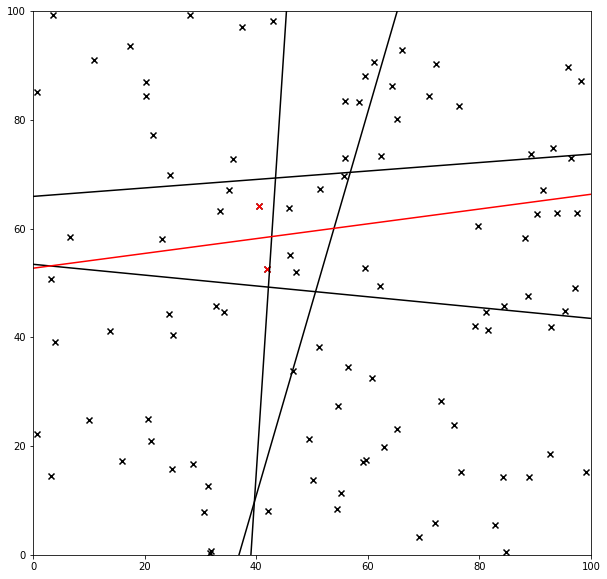

-0.995306737343103x + -0.09677033946115593y = -46.88444578782035


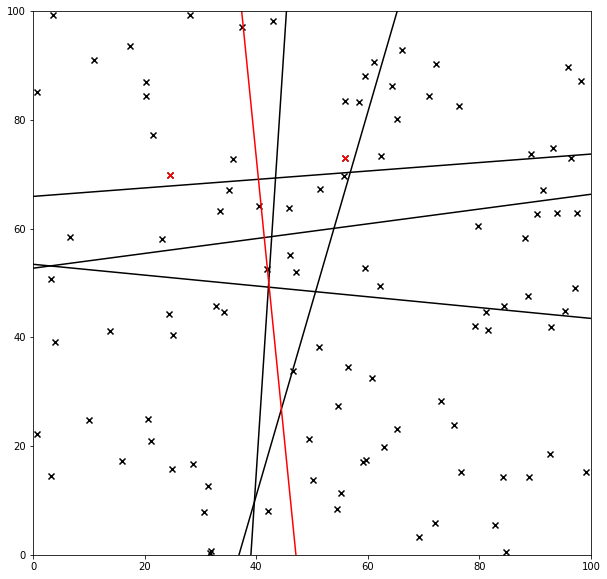

0.20651569401522582x + 0.9784432881498086y = 95.98293068457906


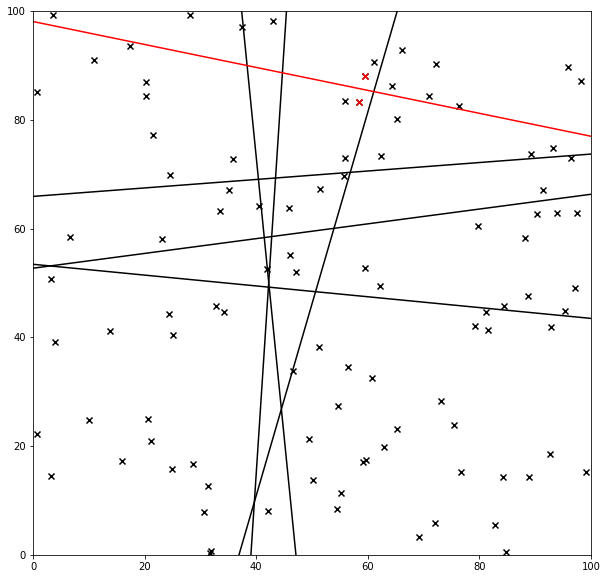

-0.23770409930196246x + 0.9713376144137746y = 70.8100589138842


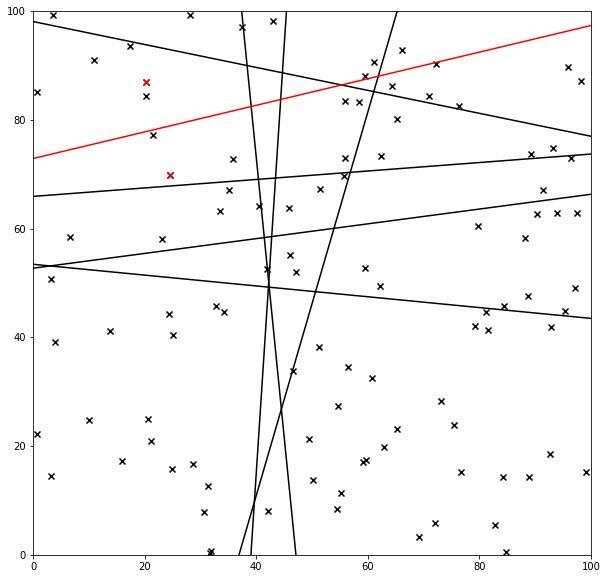

-0.9999992533638138x + 0.0012219950142939127y = -15.663699099204058


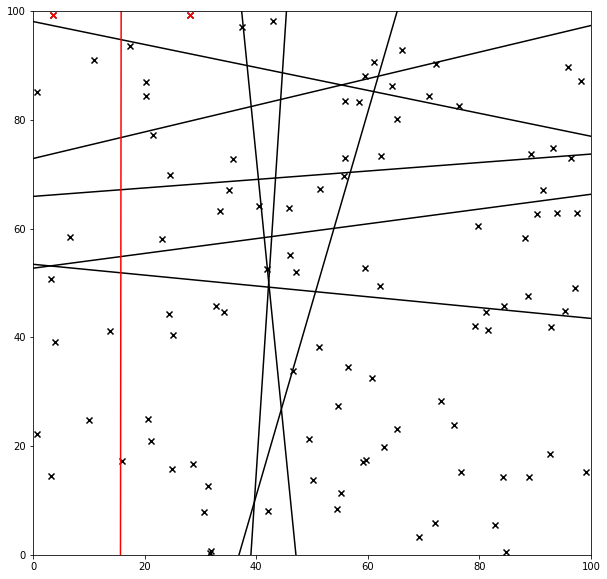

-0.8427614137798982x + 0.5382872833754361y = -12.838806615124264


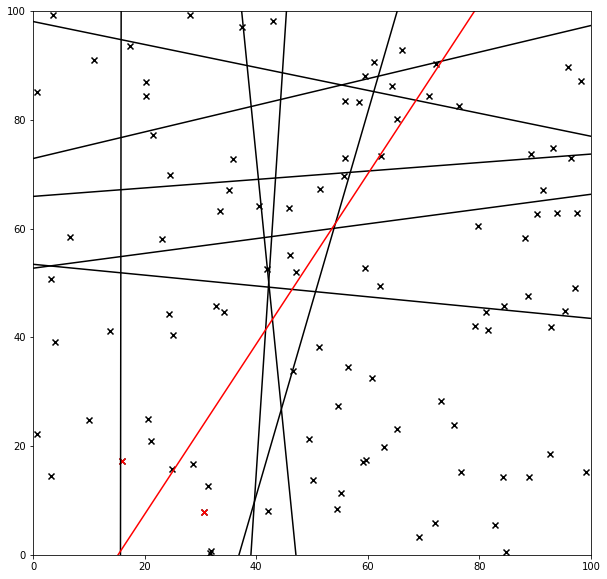

0.973356857592294x + 0.2292955031788774y = 32.618636076874374


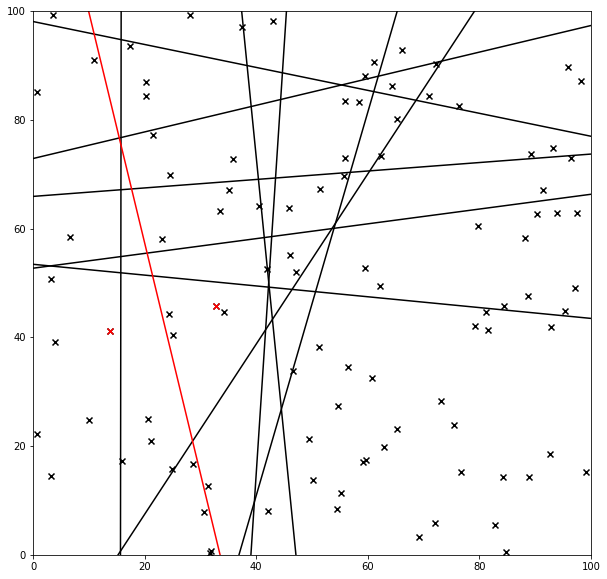

0.5296499515909429x + -0.8482163219248446y = -20.818337776925123


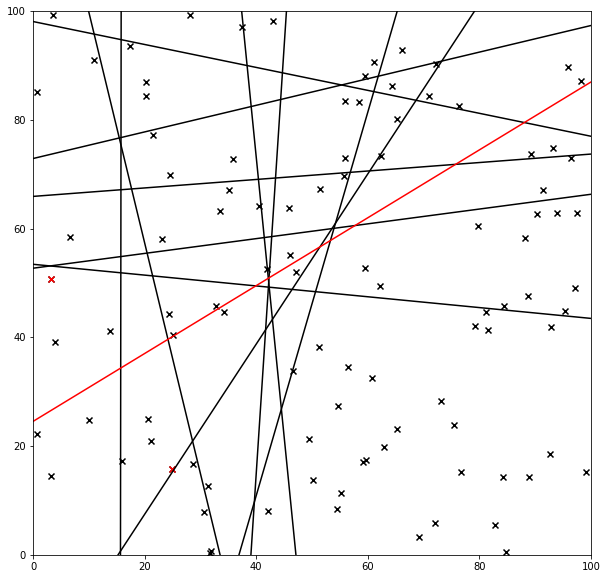

-0.9771414655949994x + -0.21259011316346899y = -12.701459149636822


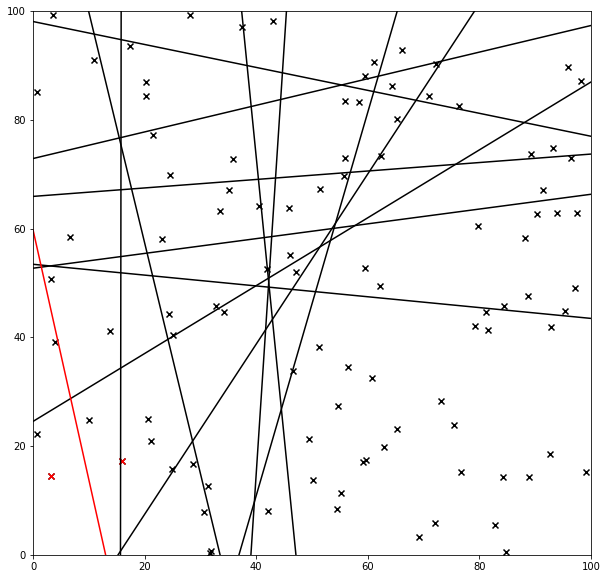

-0.3090383188857997x + -0.951049587277256y = -35.731376488632705


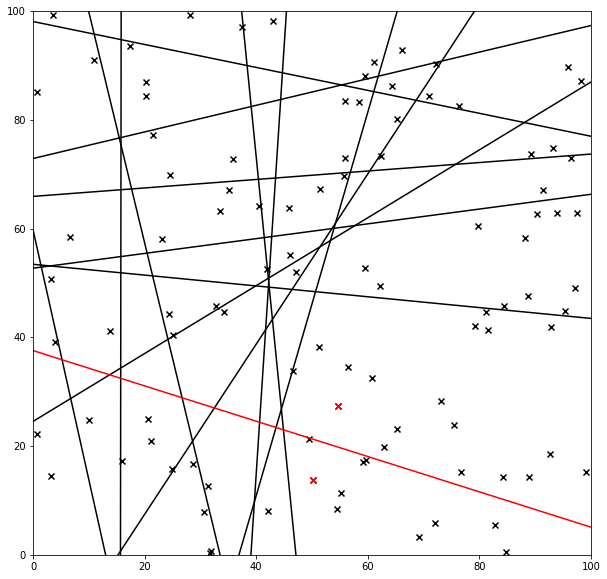

-0.9702640717494818x + -0.24204881960488137y = -78.30962016016797


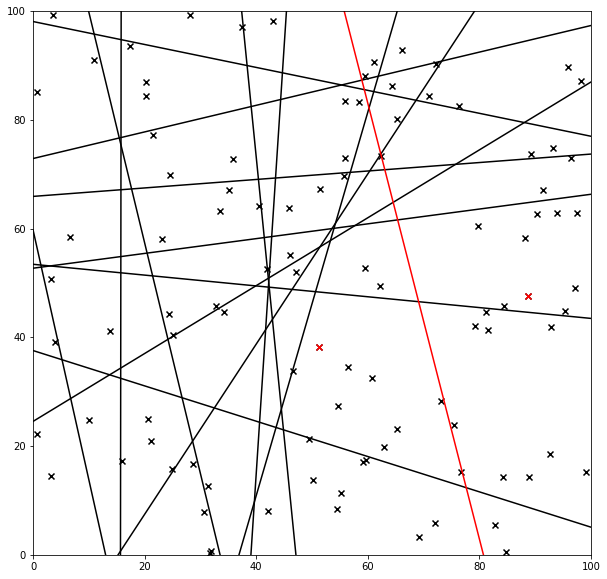

-0.12456424102963293x + -0.992211544912027y = -49.07208992426277


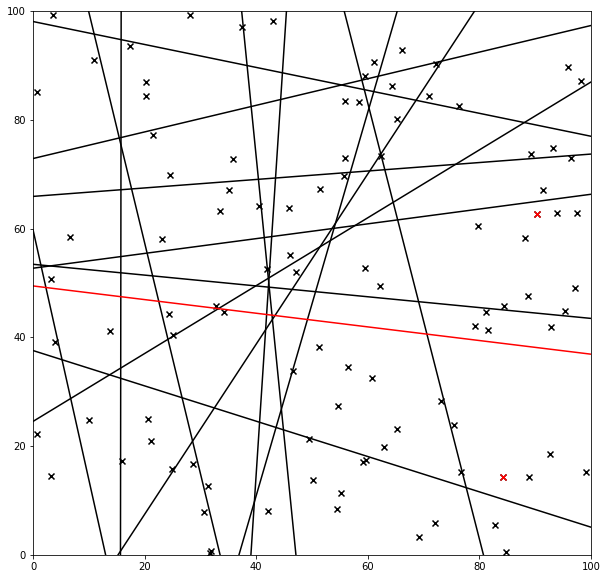

0.9323864594569232x + 0.36146298596313187y = 103.8940158623551


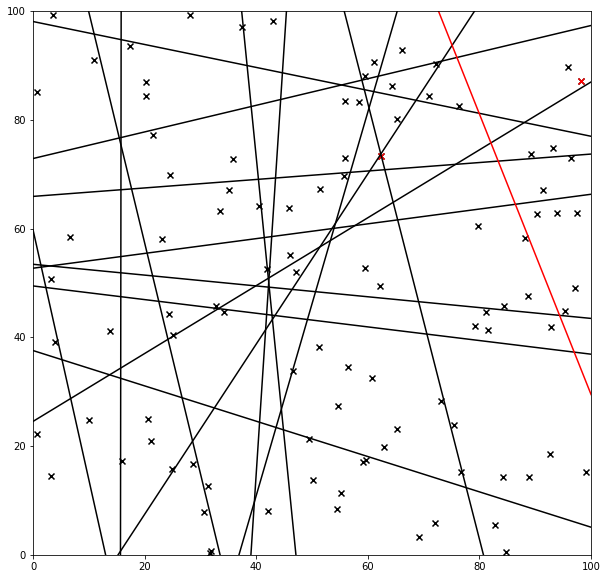

-0.3603992792021623x + 0.9327981344055969y = 35.339799320472046


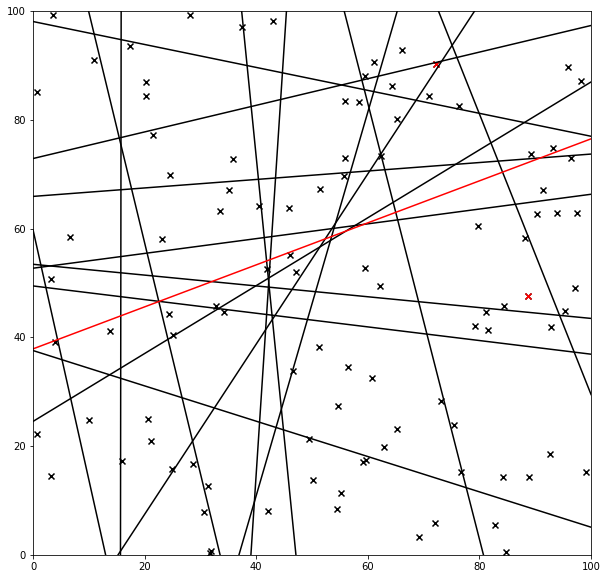

0.28663898869247334x + 0.958038668406112y = 74.54877072358425


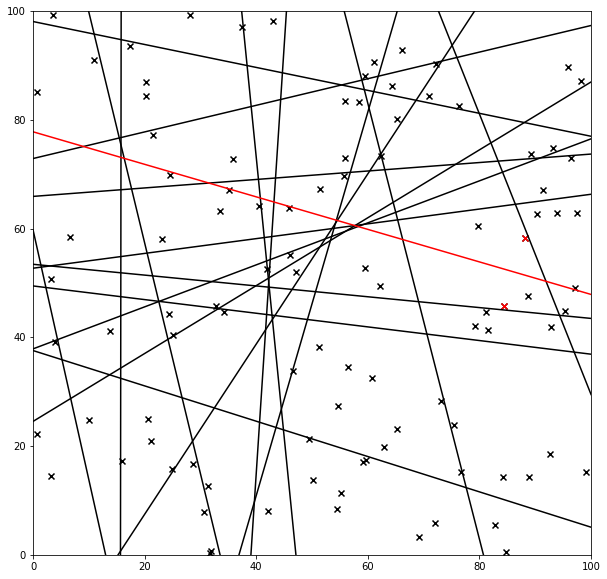

0.9499097280631255x + -0.31252441269609504y = 63.27910008922326


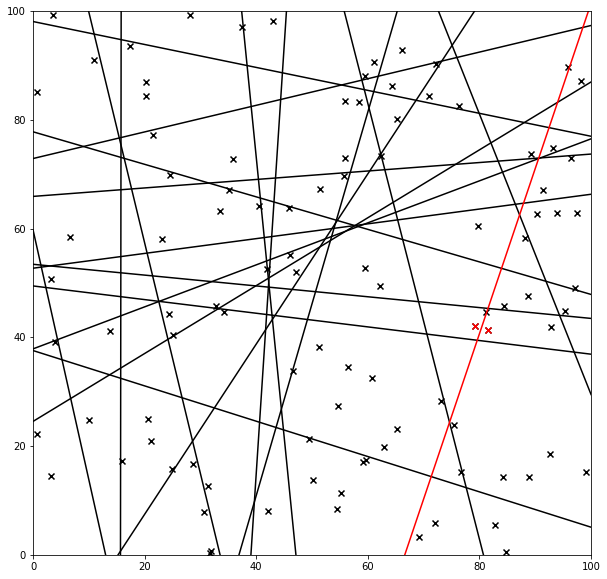

0.2673408098622195x + 0.9636020399429489y = 103.67194576591558


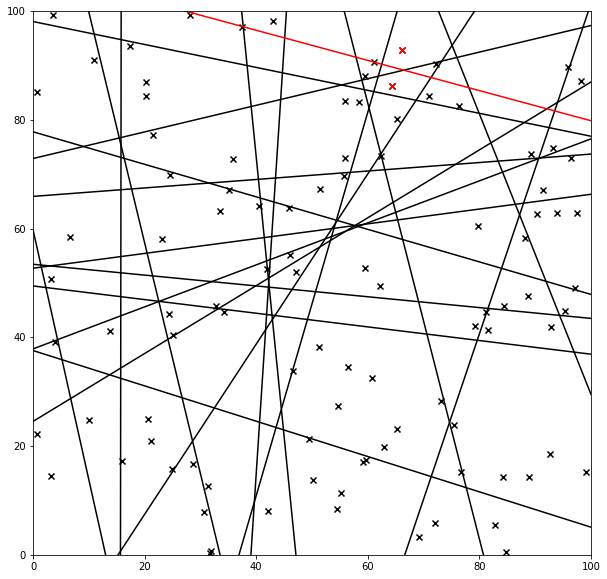

-0.17350757466443148x + 0.9848325347662245y = 38.86997908652877


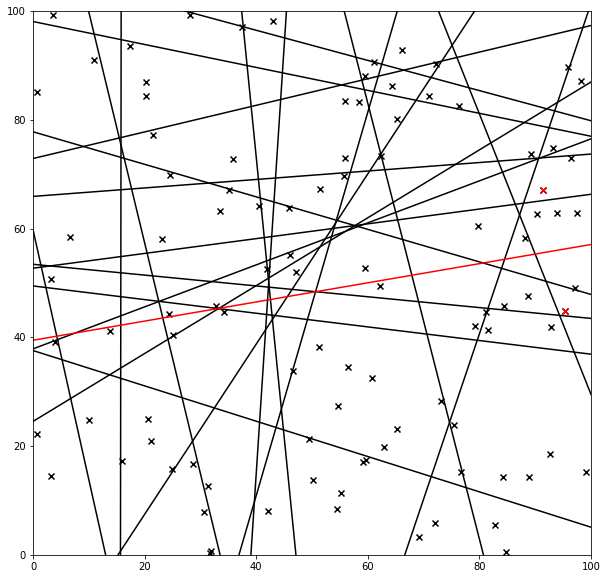

0.6905465356581764x + -0.7232879662281758y = 2.9907659754166502


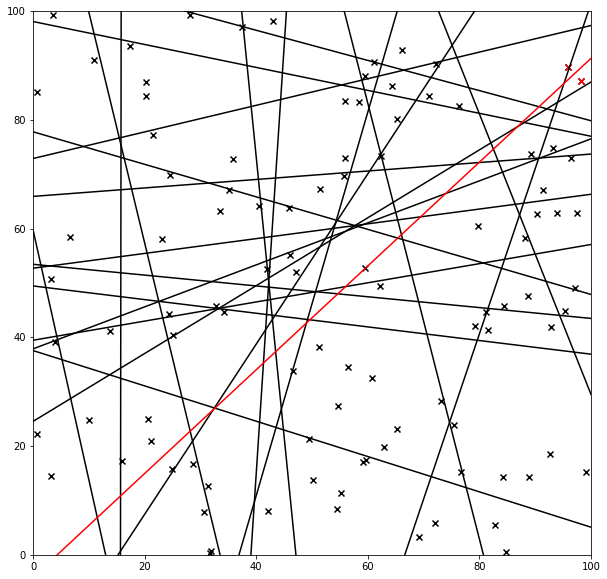

0.9999669525272965x + -0.008129812622171498y = 95.15051394865235


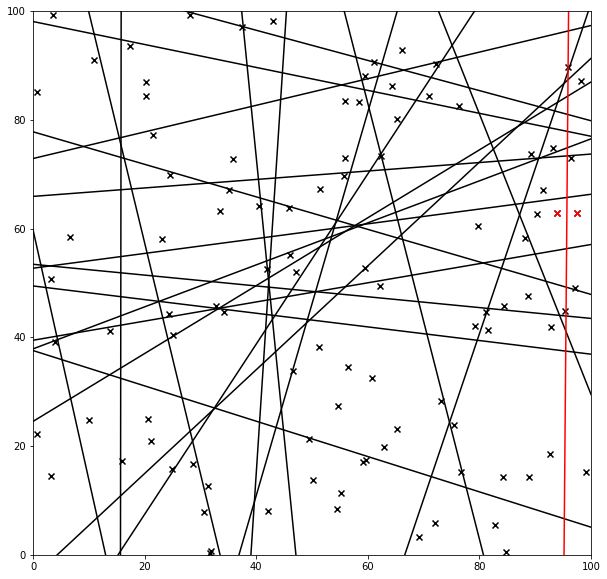

0.7046069894788588x + 0.7095977666097457y = 67.86755240112362


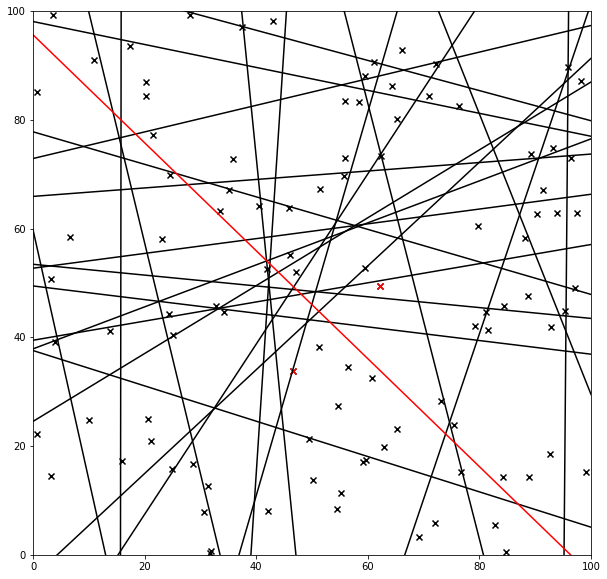

-0.7133091116823844x + -0.7008495638800724y = -60.167966207973706


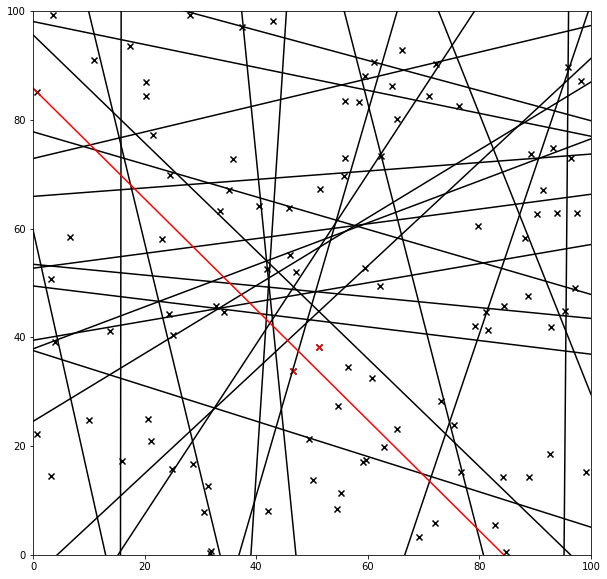

-0.8398612955982495x + 0.5428010723607957y = -55.632831657620336


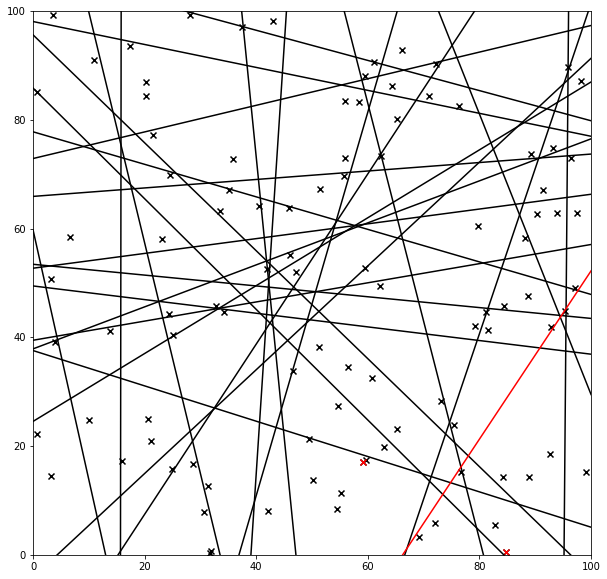

0.8817116601099466x + 0.47178866924308605y = 50.85885123764935


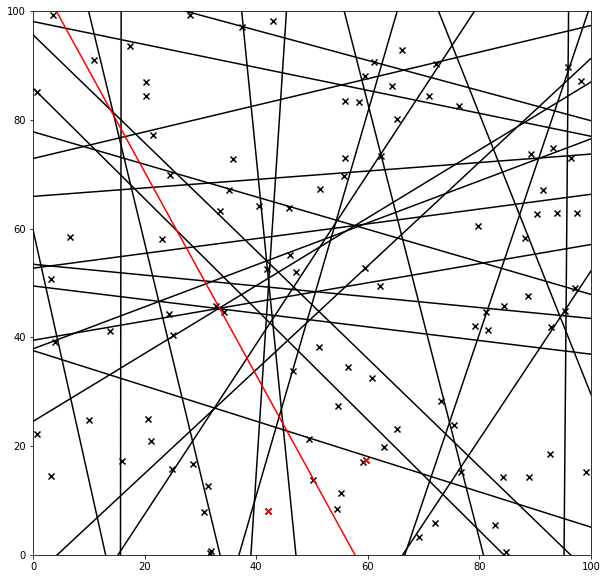

In [12]:
tree = split_nodes(vectors)

In [13]:
# pickle.dump(tree, file= open("tree.pickle", "wb"))
# tree = pickle.load(open("tree.pickle", "rb"))

In [14]:
# search nearest neighbours to this vector
v = [50, 50]

required_steps = 0

node = tree

assert node.instances > k

print(f"instances: {node.instances}")

while node.instances >= k and node.hyperplane is not None:
    parent = node
    required_steps += 1
    
    if is_on_left(v, node.hyperplane) is True:
        node = node.left
        print(f"go to left: {node.instances} > {k}")
    else:
        node = node.right
        print(f"go to right: {node.instances} > {k}")
# node = parent

print(f"nearest neigbours can be found in {required_steps} steps")

instances: 100
go to left: 47 > 3
go to left: 28 > 3
go to left: 11 > 3
go to left: 5 > 3
nearest neigbours can be found in 4 steps


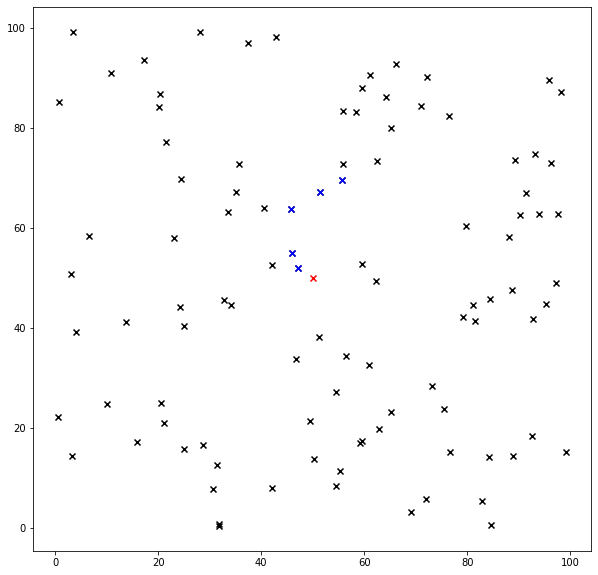

In [15]:
fig = plt.figure(figsize=(10, 10))

for x, y in vectors:
    plt.scatter(x, y, c = "black", marker = "x")

plt.scatter(v[0], v[1], c = "red", marker = "x")

for neighbour in node.value:
    plt.scatter(neighbour[0], neighbour[1], c = "blue", marker = "x")